In [1]:
!pip install stardist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 5.4 MB/s eta 0:00:00


In [2]:
from stardist.models import StarDist2D
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt

In [3]:
StarDist2D.from_pretrained()

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None


In [5]:
model_fluo = StarDist2D.from_pretrained("2D_versatile_fluo")

Found model '2D_versatile_fluo' for 'StarDist2D'.
5320433/5320433 [==============================] - 0s 0us/step
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


1/1 [==============================] - 0s 454ms/step


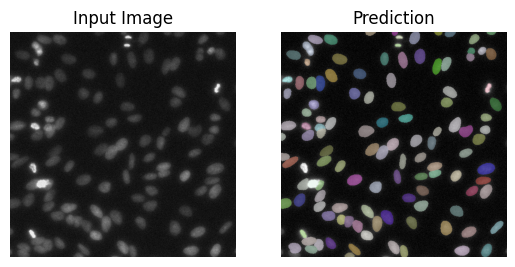

In [7]:
img = test_image_nuclei_2d()
labels, _ = model_fluo.predict_instances(normalize(img))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Input Image")

plt.subplot(1, 2, 2)
plt.imshow(render_label(labels, img=img))
plt.axis("off")
plt.title("Prediction")

plt.show()

In [8]:
from skimage import io

In [9]:
fl_img = io.imread("./test.png")

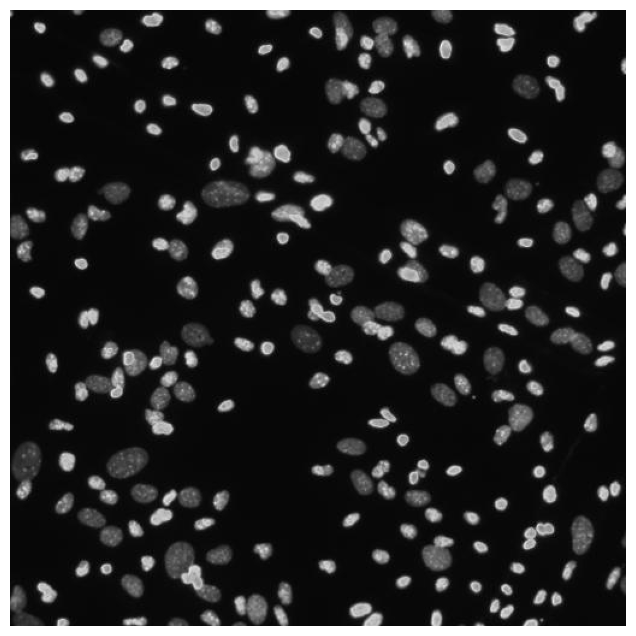

In [10]:
plt.figure(figsize=(8, 8))
plt.imshow(fl_img, cmap="gray")
plt.axis("off")
plt.show()

In [11]:
fl_img_labels, fl_img_details = model_fluo.predict_instances(normalize(fl_img))

1/1 [==============================] - 1s 598ms/step


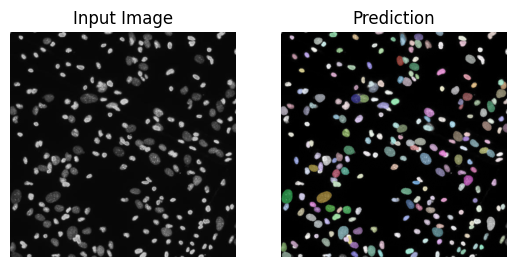

In [12]:
plt.subplot(1, 2, 1)
plt.imshow(fl_img, cmap="gray")
plt.axis("off")
plt.title("Input Image")

plt.subplot(1, 2, 2)
plt.imshow(render_label(fl_img_labels, img=fl_img))
plt.axis("off")
plt.title("Prediction")

plt.show()

In [31]:
fl_img_zoomed = fl_img[200:400, 200:400]

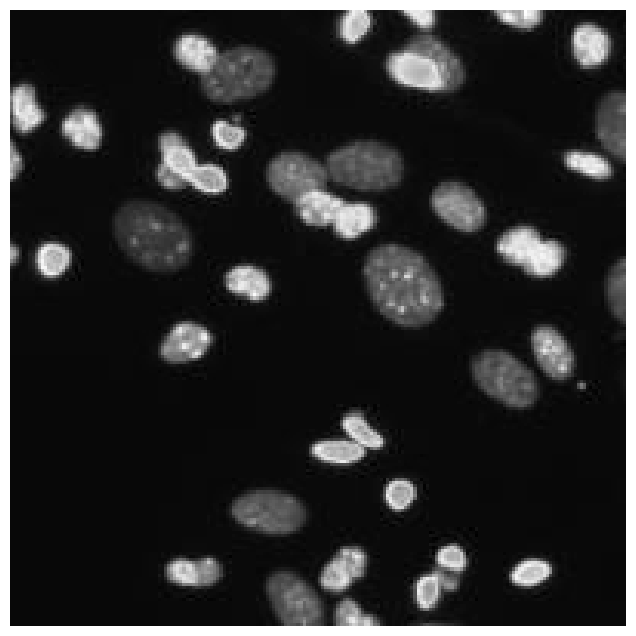

In [32]:
plt.figure(figsize=(8, 8))
plt.imshow(fl_img_zoomed, cmap="gray")
plt.axis("off")
plt.show()

1/1 [==============================] - 0s 94ms/step


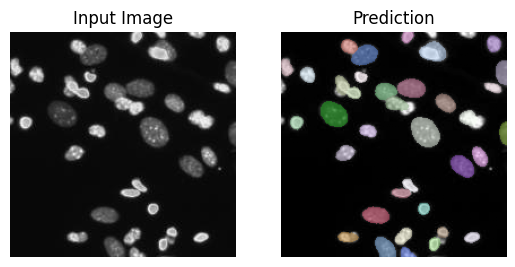

In [33]:
fl_img_labels, fl_img_details = model_fluo.predict_instances(normalize(fl_img_zoomed))

plt.subplot(1, 2, 1)
plt.imshow(fl_img_zoomed, cmap="gray")
plt.axis("off")
plt.title("Input Image")

plt.subplot(1, 2, 2)
plt.imshow(render_label(fl_img_labels, img=fl_img_zoomed))
plt.axis("off")
plt.title("Prediction")

plt.show()

In [34]:
from stardist import random_label_cmap, _draw_polygons, export_imagej_rois
import numpy as np

In [35]:
np.random.seed(42)
lbl_cmap = random_label_cmap()

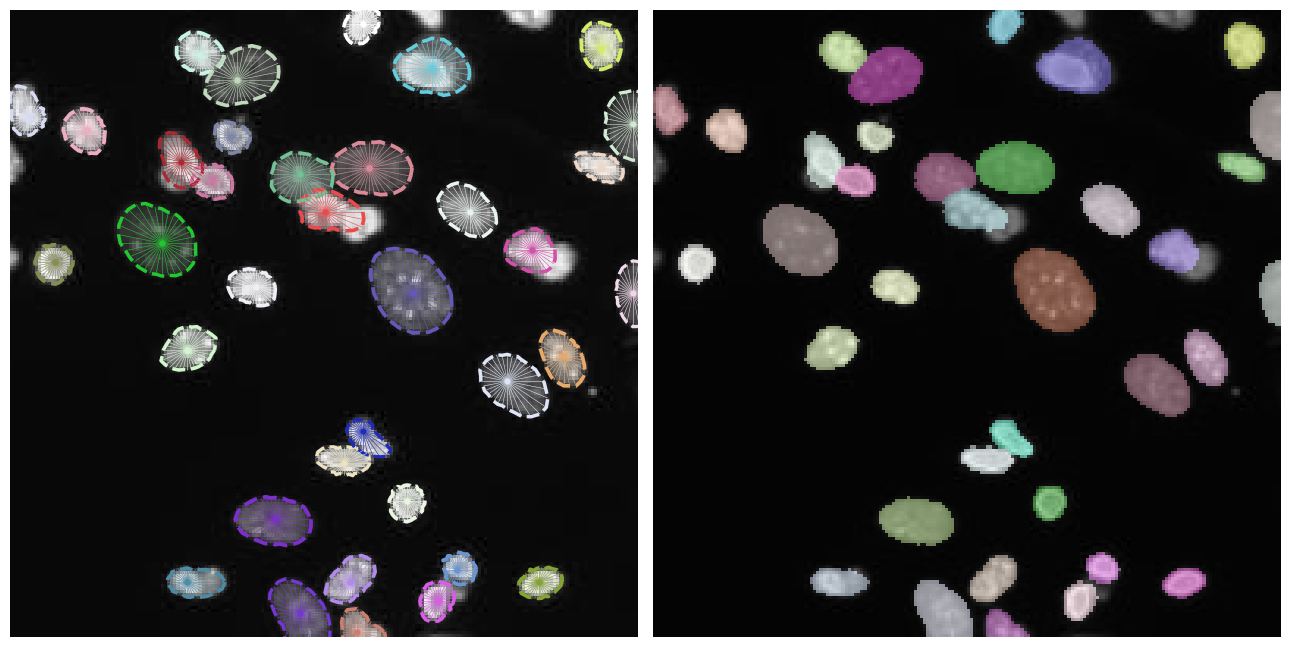

In [36]:
plt.figure(figsize=(13, 10))
img_show = fl_img_zoomed if fl_img_zoomed.ndim == 2 else fl_img_zoomed[..., 0]
coord, points, prob = fl_img_details["coord"], fl_img_details["points"], fl_img_details["prob"]
plt.subplot(121)
plt.imshow(img_show, cmap="gray")
plt.axis("off")

a = plt.axis()
_draw_polygons(coord, points, prob, show_dist=True)
plt.axis(a)
plt.subplot(122)
plt.imshow(img_show, cmap="gray")
plt.axis("off")
plt.imshow(fl_img_labels, cmap=lbl_cmap, alpha=0.5)
plt.tight_layout()
plt.show()

In [37]:
img2 = io.imread("./test2.jpg")

In [42]:
model_HE = StarDist2D.from_pretrained("2D_versatile_he")

Found model '2D_versatile_he' for 'StarDist2D'.
5294730/5294730 [==============================] - 0s 0us/step
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


In [43]:
he_labels, _ = model_HE.predict_instances(normalize(img2))

1/1 [==============================] - 2s 2s/step


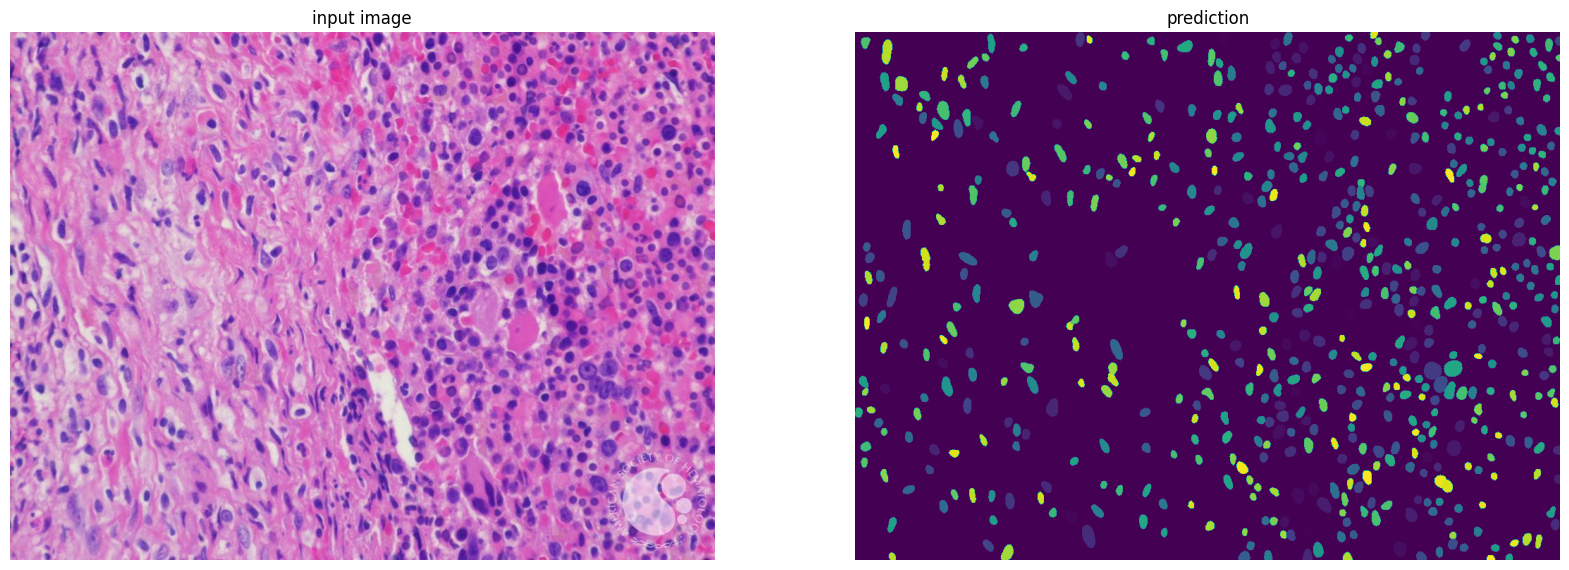

In [45]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,2,1)
plt.imshow(img2, cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(he_labels)
plt.axis("off")
plt.title("prediction")

plt.show()